## Simple K-means clustering on the Iris dataset

### Importing the Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Data

In [56]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('iris.csv')

### Explore Data

In [57]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Building the Model

##### Feature Selection

In [59]:
x = dataset[['sepal_length','sepal_width','petal_length','petal_width']].values

Now we will implement **The Elbow Method** on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification

In [60]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

In [61]:
wcss = []     # within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[680.8244, 152.36870647733903, 78.94084142614601, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479663, 30.063874432733133, 27.87928787878788, 26.048202248044355]


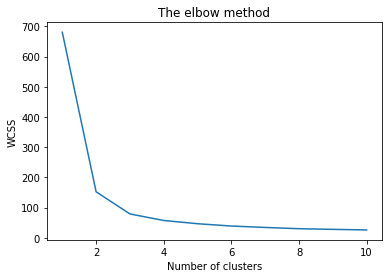

In [62]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

You can clearly see why it is called *The elbow method* from the above graph, the optimum clusters is where the elbow occurs. 

This is when the *Within Cluster Sum of Squares (WCSS)* doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.